In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
from scipy import stats
import Bio.PDB
import pandas as pd
from scipy.stats import ttest_rel
import scipy.stats as stats
from Bio.PDB import *
plt.rcParams.update({'font.size': 30})

In [26]:
close_resi = pd.read_csv('../close_resi.csv')
metrics_not_close = pd.read_csv('metrics_not_close.csv')
metrics_close = pd.read_csv('metrics_close.csv')
metrics = pd.read_csv('combined_metrics.csv')
all_pdb_stats_data= pd.read_csv('all_pdb_stats_data.csv')
rotamer_sum = pd.read_csv('rotamer_summary.csv')

In [27]:
all_pdb_stats_data['PDB_upper'] = all_pdb_stats_data['PDB'].str.upper()
all_pdb_stats_data = all_pdb_stats_data.drop(columns=['PDB'])

In [28]:
all_pdb_stats_data = all_pdb_stats_data.rename(columns={'PDB_upper': 'PDB'})

In [29]:
metrics.head()

,Unnamed: 0,PDB,RSCCS_med_close,RSCCS_mean_close,OPIA_med_close,OPIA_mean_close,EDIA_med_close,EDIA_mean_close,RSR_med_close,RSR_mean_close,...,RSCCS_med_all,RSCCS_mean_all,OPIA_med_all,OPIA_mean_all,EDIA_med_all,EDIA_mean_all,RSR_med_all,RSR_mean_all,SRSR_med_all,SRSR_mean_all
0,0,102D,0.966287,0.965233,66.6667,67.403933,0.823468,0.802644,0.049762,0.048199,...,0.949512,0.927034,0.0,22.079524,0.522450,0.445161,0.054749,0.066456,0.025911,0.024307
1,1,108M,0.978038,0.975582,28.5714,35.396811,0.609625,0.557056,0.034809,0.038998,...,0.981034,0.971543,20.0,27.353807,0.568045,0.535513,0.032433,0.036280,0.013841,0.016745
2,2,109D,0.973194,0.970003,80.0000,80.183892,0.873539,0.869277,0.045691,0.048185,...,0.945157,0.928061,0.0,28.543993,0.545415,0.520272,0.072083,0.089021,0.025933,0.024347
3,3,10GS,0.983776,0.979597,75.0000,76.236100,0.866959,0.829541,0.034193,0.038282,...,0.979800,0.974284,62.5,52.712440,0.797964,0.712544,0.039210,0.045141,0.009566,0.012517
4,4,110D,0.925218,0.924053,68.4211,73.843733,0.832632,0.801683,0.067648,0.066576,...,0.912829,0.891319,0.0,37.200958,0.713523,0.627947,0.067699,0.066565,0.023066,0.022639


In [260]:
all_pdb_stats_data

,Unnamed: 0,RFree,Rwork,Resolution,Spacegroup,PDB
0,0,0.21470,NaN,1.54,P 21 21 21,6QJA
1,1,0.23600,NaN,1.80,P 41 21 2,1YVT
2,2,0.24740,NaN,2.50,P 1 21 1,7LDW
3,3,0.25700,NaN,2.50,P 21 21 21,2QF0
4,4,0.22660,NaN,2.00,C 1 2 1,8B9O
...,...,...,...,...,...,...
41349,41349,0.17900,NaN,1.60,P 65 2 2,8B4W
41350,41350,0.25100,NaN,3.75,F 41 3 2,1W39
41351,41351,0.17837,NaN,1.74,P 21 21 21,5FAS
41352,41352,0.22800,NaN,3.40,I 2 2 2,1LAJ


0.0235843131705845


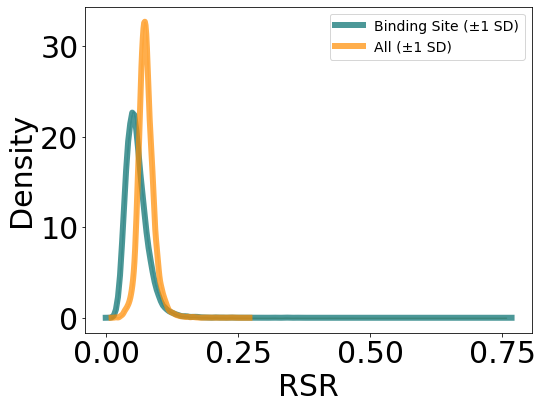

In [47]:
from scipy.stats import gaussian_kde
# Set up the plotting
plt.figure(figsize=(8, 6))

# Plot KDE for 'EDIA_mean_close' and 'EDIA_mean_all'
sns.kdeplot(metrics['RSR_mean_close'], color='#006C6C', alpha=0.7, linewidth=6)
sns.kdeplot(metrics['RSR_mean_all'], color='#FF8C00', alpha=0.7, linewidth=6)

# Calculate the values for shading (standard deviation) around the KDE
x_values = np.linspace(min(metrics['RSR_mean_close'].min(), metrics['RSR_mean_all'].min()),
                       max(metrics['RSR_mean_close'].max(), metrics['RSR_mean_all'].max()), 1000)

# KDE estimation for shading
kde_close_values = gaussian_kde(metrics['RSR_mean_close'])(x_values)
kde_all_values = gaussian_kde(metrics['RSR_mean_all'])(x_values)

# Calculate standard deviation for the shading region
std_close = np.std(metrics['RSR_mean_close'])
print(std_close)
std_all = np.std(metrics['RSR_mean_all'])

# Add shading for standard deviation around the KDE line
plt.fill_between(x_values, kde_close_values - std_close, kde_close_values + std_close, color='#006C6C', alpha=0.2, label='Close - ±1 SD')
plt.fill_between(x_values, kde_all_values - std_all, kde_all_values + std_all, color='#FF8C00', alpha=0.2, label='All - ±1 SD')

# Add error bars for each x value (±1 SD)
#plt.errorbar(x_values, kde_close_values, yerr=std_close, fmt='o', color='#006C6C', alpha=0.5, label='Close - Error Bars')
#plt.errorbar(x_values, kde_all_values, yerr=std_all, fmt='o', color='#FF8C00', alpha=0.5, label='All - Error Bars')

# Add labels and legend
plt.xlabel('RSR')
plt.ylabel('Density')
plt.legend(['Binding Site (±1 SD)', 'All (±1 SD)'], fontsize=14)

# Show the plot
plt.show()


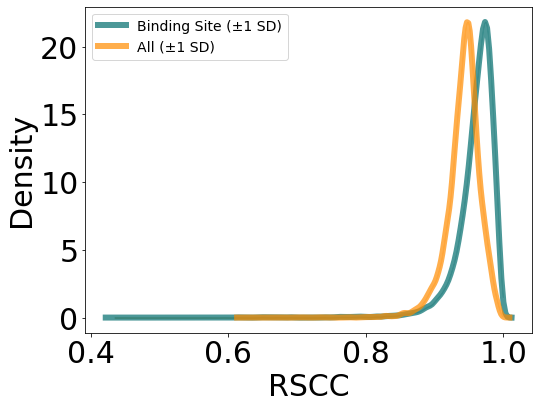

In [42]:
from scipy.stats import gaussian_kde
# Set up the plotting
plt.figure(figsize=(8, 6))

# Plot KDE for 'EDIA_mean_close' and 'EDIA_mean_all'
sns.kdeplot(metrics['RSCCS_mean_close'], color='#006C6C', alpha=0.7, linewidth=6)
sns.kdeplot(metrics['RSCCS_mean_all'], color='#FF8C00', alpha=0.7, linewidth=6)

# Calculate the values for shading (standard deviation) around the KDE
x_values = np.linspace(min(metrics['RSCCS_mean_close'].min(), metrics['RSCCS_mean_all'].min()),
                       max(metrics['RSCCS_mean_close'].max(), metrics['RSCCS_mean_all'].max()), 1000)

# KDE estimation for shading
kde_close_values = gaussian_kde(metrics['RSCCS_mean_close'])(x_values)
kde_all_values = gaussian_kde(metrics['RSCCS_mean_all'])(x_values)

# Calculate standard deviation for the shading region
std_close = np.std(metrics['RSCCS_mean_close'])
std_all = np.std(metrics['RSCCS_mean_all'])

# Add shading for standard deviation around the KDE line
plt.fill_between(x_values, kde_close_values - std_close, kde_close_values + std_close, color='#006C6C', alpha=0.2, label='Close - ±1 SD')
plt.fill_between(x_values, kde_all_values - std_all, kde_all_values + std_all, color='#FF8C00', alpha=0.2, label='All - ±1 SD')

# Add error bars for each x value (±1 SD)
#plt.errorbar(x_values, kde_close_values, yerr=std_close, fmt='o', color='#006C6C', alpha=0.5, label='Close - Error Bars')
#plt.errorbar(x_values, kde_all_values, yerr=std_all, fmt='o', color='#FF8C00', alpha=0.5, label='All - Error Bars')

# Add labels and legend
plt.xlabel('RSCC')
plt.ylabel('Density')
plt.legend(['Binding Site (±1 SD)', 'All (±1 SD)'], fontsize=14)

# Show the plot
plt.show()


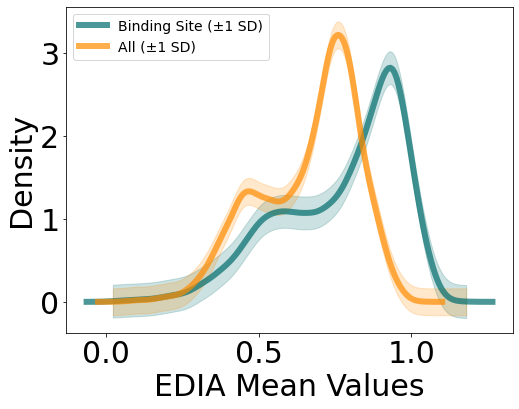

In [40]:
from scipy.stats import gaussian_kde
# Set up the plotting
plt.figure(figsize=(8, 6))

# Plot KDE for 'EDIA_mean_close' and 'EDIA_mean_all'
sns.kdeplot(metrics['EDIA_mean_close'], color='#006C6C', alpha=0.7, linewidth=6)
sns.kdeplot(metrics['EDIA_mean_all'], color='#FF8C00', alpha=0.7, linewidth=6)

# Calculate the values for shading (standard deviation) around the KDE
x_values = np.linspace(min(metrics['EDIA_mean_close'].min(), metrics['EDIA_mean_all'].min()),
                       max(metrics['EDIA_mean_close'].max(), metrics['EDIA_mean_all'].max()), 1000)

# KDE estimation for shading
kde_close_values = gaussian_kde(metrics['EDIA_mean_close'])(x_values)
kde_all_values = gaussian_kde(metrics['EDIA_mean_all'])(x_values)

# Calculate standard deviation for the shading region
std_close = np.std(metrics['EDIA_mean_close'])
std_all = np.std(metrics['EDIA_mean_all'])

# Add shading for standard deviation around the KDE line
plt.fill_between(x_values, kde_close_values - std_close, kde_close_values + std_close, color='#006C6C', alpha=0.2, label='Close - ±1 SD')
plt.fill_between(x_values, kde_all_values - std_all, kde_all_values + std_all, color='#FF8C00', alpha=0.2, label='All - ±1 SD')

# Add error bars for each x value (±1 SD)
#plt.errorbar(x_values, kde_close_values, yerr=std_close, fmt='o', color='#006C6C', alpha=0.5, label='Close - Error Bars')
#plt.errorbar(x_values, kde_all_values, yerr=std_all, fmt='o', color='#FF8C00', alpha=0.5, label='All - Error Bars')

# Add labels and legend
plt.xlabel('EDIA Mean Values')
plt.ylabel('Density')
plt.legend(['Binding Site (±1 SD)', 'All (±1 SD)'], fontsize=14)

# Show the plot
plt.show()


In [30]:
metrics_stats = pd.merge(all_pdb_stats_data, metrics, on=['PDB'])

In [7]:
rotamer_sum

,Unnamed: 0,PDB,total_residues,outlier_all,allowed_all,close_residues,close_outliers,close_allowed
0,0,4IAU,153,1,3,0,0,0
1,1,7AW4,471,10,19,22,0,1
2,2,1YRA,469,14,22,0,0,0
3,3,8FEU,560,11,22,182,6,12
4,4,2F6H,355,1,13,0,0,0
...,...,...,...,...,...,...,...,...
41000,41000,7YUJ,262,2,5,0,0,0
41001,41001,6LIR,727,8,32,0,0,0
41002,41002,8I5C,7159,265,394,0,0,0
41003,41003,6I6R,1010,2,29,0,0,0


In [11]:
rotamer_sum = rotamer_sum[rotamer_sum['close_residues']>0]

In [12]:
rotamer_sum['per_all_outlier'] = rotamer_sum['outlier_all']/rotamer_sum['total_residues']
rotamer_sum['per_all_allowed'] = rotamer_sum['allowed_all']/rotamer_sum['total_residues']
rotamer_sum['per_close_allowed'] = rotamer_sum['close_allowed']/rotamer_sum['close_residues']
rotamer_sum['per_close_outlier'] = rotamer_sum['close_outliers']/rotamer_sum['close_residues']

In [16]:
rotamer_sum.head()

,Unnamed: 0,PDB,total_residues,outlier_all,allowed_all,close_residues,close_outliers,close_allowed,per_all_outlier,per_all_allowed,per_close_allowed,per_close_outlier
1,1,7AW4,471,10,19,22,0,1,0.021231,0.040340,0.045455,0.000000
3,3,8FEU,560,11,22,182,6,12,0.019643,0.039286,0.065934,0.032967
5,5,4B70,322,1,11,14,0,0,0.003106,0.034161,0.000000,0.000000
6,6,3BM9,184,4,4,13,0,1,0.021739,0.021739,0.076923,0.000000
7,7,6FFD,101,0,2,119,0,0,0.000000,0.019802,0.000000,0.000000


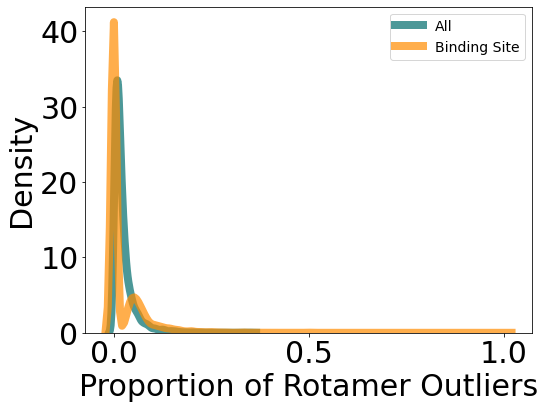

In [14]:
plt.figure(figsize=(8, 6))
sns.kdeplot(rotamer_sum['per_all_outlier'], color='#006C6C', alpha=0.7, linewidth=8)
sns.kdeplot(rotamer_sum['per_close_outlier'],color='#FF8C00', alpha=0.7, linewidth=8)
plt.xlabel('Proportion of Rotamer Outliers')
plt.ylabel('Density')
plt.legend(['All', 'Binding Site'], fontsize=14)

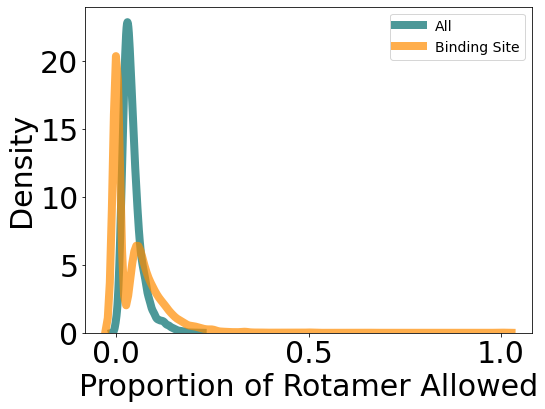

In [15]:
plt.figure(figsize=(8, 6))
sns.kdeplot(rotamer_sum['per_all_allowed'], color='#006C6C', alpha=0.7, linewidth=8)
sns.kdeplot(rotamer_sum['per_close_allowed'],color='#FF8C00', alpha=0.7, linewidth=8)
plt.xlabel('Proportion of Rotamer Allowed')
plt.ylabel('Density')
plt.legend(['All', 'Binding Site'], fontsize=14)

In [232]:
metrics_stats.head()

,Unnamed: 0_x,RFree,Rwork,Resolution,Spacegroup,PDB,Unnamed: 0_y,RSCCS_med_close,RSCCS_mean_close,OPIA_med_close,...,RSCCS_med_all,RSCCS_mean_all,OPIA_med_all,OPIA_mean_all,EDIA_med_all,EDIA_mean_all,RSR_med_all,RSR_mean_all,SRSR_med_all,SRSR_mean_all
0,0,0.2147,NaN,1.54,P 21 21 21,6QJA,19621,0.968589,0.964724,100.0000,...,0.949040,0.931575,80.00000,63.774305,0.849959,0.764825,0.076543,0.085287,0.009163,0.012496
1,15,0.1898,NaN,1.13,P 21 21 2,6Q9L,19495,0.969869,0.966996,87.5000,...,0.959723,0.944773,85.71430,60.094906,0.847583,0.784142,0.076313,0.087396,0.013954,0.013713
2,21,NaN,NaN,1.33,P 31,2QCA,5982,0.991283,0.989879,100.0000,...,0.983186,0.971327,93.13315,69.792610,0.905161,0.784358,0.051365,0.065946,0.005053,0.007387
3,24,0.1618,NaN,1.85,P 21 21 21,7LJI,21615,0.985330,0.982840,100.0000,...,0.973071,0.958361,80.00000,58.677587,0.871094,0.788216,0.068722,0.087681,0.013053,0.017157
4,31,0.2830,NaN,1.70,P 43 21 2,2AUB,1937,0.976704,0.974845,84.6591,...,0.975581,0.972993,100.00000,90.430812,0.983190,0.936414,0.042441,0.045170,0.007640,0.009418


RSCCS_mean
   Unnamed: 0_x    RFree  Rwork  Resolution Spacegroup   PDB  Unnamed: 0_y  \
0             4  0.22660    NaN        2.00    C 1 2 1  8B9O         14762   
1             5  0.20800    NaN        2.55   P 61 2 2  6BEB         10206   
2            10  0.20078    NaN        2.74   P 1 21 1  8QPO         15428   
3            15  0.18980    NaN        1.13  P 21 21 2  6Q9L         11168   
4            22  0.21600    NaN        2.00  P 21 21 2  1L5K           435   

   RSCCS_med_close  RSCCS_mean_close  OPIA_med_close  ...  RSCCS_mean_all  \
0         0.967196          0.963148         77.5000  ...        0.934873   
1         0.980306          0.972194         36.3636  ...        0.951815   
2         0.993733          0.992585         20.0000  ...        0.989786   
3         0.976668          0.973449        100.0000  ...        0.945131   
4         0.977916          0.975387         57.1429  ...        0.961177   

   OPIA_med_all  OPIA_mean_all  EDIA_med_all  EDIA_mean_a

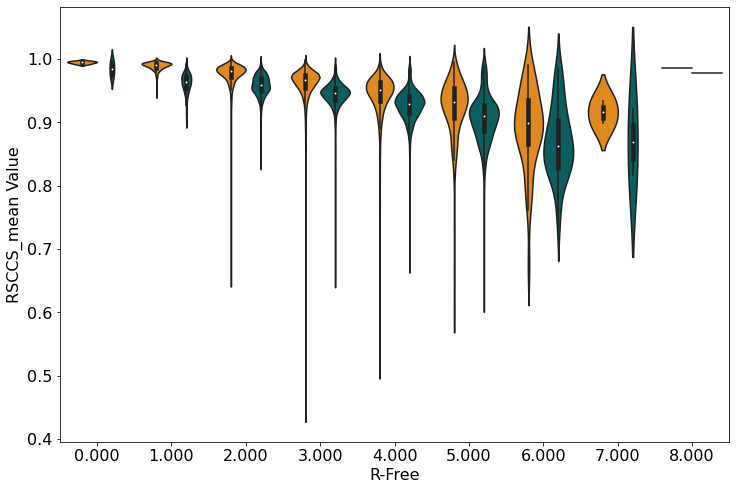

OPIA_mean
   Unnamed: 0_x    RFree  Rwork  Resolution Spacegroup   PDB  Unnamed: 0_y  \
0             4  0.22660    NaN        2.00    C 1 2 1  8B9O         14762   
1             5  0.20800    NaN        2.55   P 61 2 2  6BEB         10206   
2            10  0.20078    NaN        2.74   P 1 21 1  8QPO         15428   
3            15  0.18980    NaN        1.13  P 21 21 2  6Q9L         11168   
4            22  0.21600    NaN        2.00  P 21 21 2  1L5K           435   

   RSCCS_med_close  RSCCS_mean_close  OPIA_med_close  ...  RSCCS_mean_all  \
0         0.967196          0.963148         77.5000  ...        0.934873   
1         0.980306          0.972194         36.3636  ...        0.951815   
2         0.993733          0.992585         20.0000  ...        0.989786   
3         0.976668          0.973449        100.0000  ...        0.945131   
4         0.977916          0.975387         57.1429  ...        0.961177   

   OPIA_med_all  OPIA_mean_all  EDIA_med_all  EDIA_mean_al

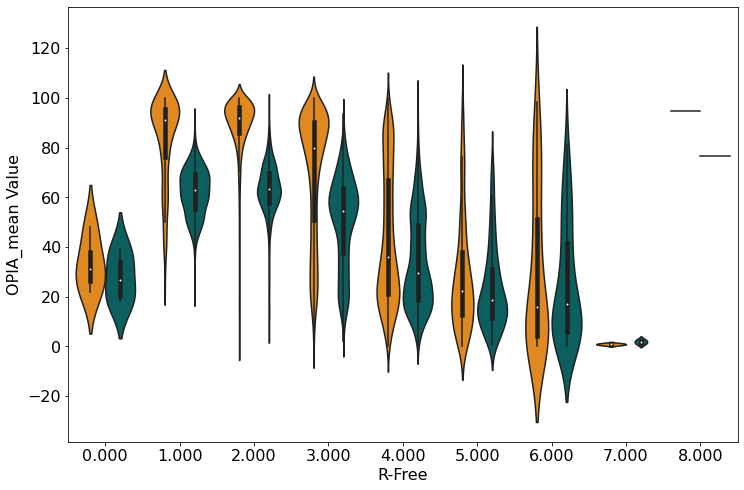

EDIA_mean
   Unnamed: 0_x    RFree  Rwork  Resolution Spacegroup   PDB  Unnamed: 0_y  \
0             4  0.22660    NaN        2.00    C 1 2 1  8B9O         14762   
1             5  0.20800    NaN        2.55   P 61 2 2  6BEB         10206   
2            10  0.20078    NaN        2.74   P 1 21 1  8QPO         15428   
3            15  0.18980    NaN        1.13  P 21 21 2  6Q9L         11168   
4            22  0.21600    NaN        2.00  P 21 21 2  1L5K           435   

   RSCCS_med_close  RSCCS_mean_close  OPIA_med_close  ...  RSCCS_mean_all  \
0         0.967196          0.963148         77.5000  ...        0.934873   
1         0.980306          0.972194         36.3636  ...        0.951815   
2         0.993733          0.992585         20.0000  ...        0.989786   
3         0.976668          0.973449        100.0000  ...        0.945131   
4         0.977916          0.975387         57.1429  ...        0.961177   

   OPIA_med_all  OPIA_mean_all  EDIA_med_all  EDIA_mean_al

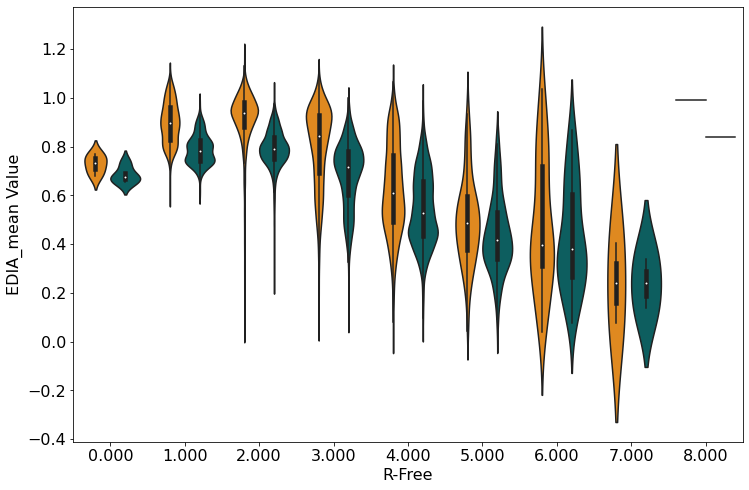

RSR_mean
   Unnamed: 0_x    RFree  Rwork  Resolution Spacegroup   PDB  Unnamed: 0_y  \
0             4  0.22660    NaN        2.00    C 1 2 1  8B9O         14762   
1             5  0.20800    NaN        2.55   P 61 2 2  6BEB         10206   
2            10  0.20078    NaN        2.74   P 1 21 1  8QPO         15428   
3            15  0.18980    NaN        1.13  P 21 21 2  6Q9L         11168   
4            22  0.21600    NaN        2.00  P 21 21 2  1L5K           435   

   RSCCS_med_close  RSCCS_mean_close  OPIA_med_close  ...  RSCCS_mean_all  \
0         0.967196          0.963148         77.5000  ...        0.934873   
1         0.980306          0.972194         36.3636  ...        0.951815   
2         0.993733          0.992585         20.0000  ...        0.989786   
3         0.976668          0.973449        100.0000  ...        0.945131   
4         0.977916          0.975387         57.1429  ...        0.961177   

   OPIA_med_all  OPIA_mean_all  EDIA_med_all  EDIA_mean_all

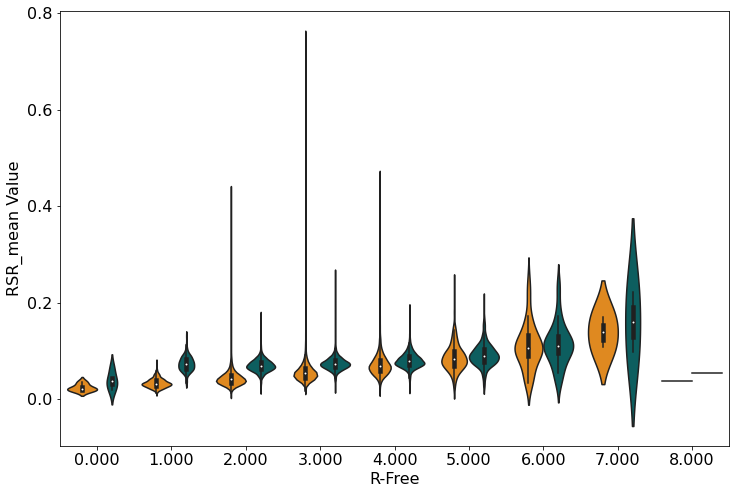

SRSR_mean
   Unnamed: 0_x    RFree  Rwork  Resolution Spacegroup   PDB  Unnamed: 0_y  \
0             4  0.22660    NaN        2.00    C 1 2 1  8B9O         14762   
1             5  0.20800    NaN        2.55   P 61 2 2  6BEB         10206   
2            10  0.20078    NaN        2.74   P 1 21 1  8QPO         15428   
3            15  0.18980    NaN        1.13  P 21 21 2  6Q9L         11168   
4            22  0.21600    NaN        2.00  P 21 21 2  1L5K           435   

   RSCCS_med_close  RSCCS_mean_close  OPIA_med_close  ...  RSCCS_mean_all  \
0         0.967196          0.963148         77.5000  ...        0.934873   
1         0.980306          0.972194         36.3636  ...        0.951815   
2         0.993733          0.992585         20.0000  ...        0.989786   
3         0.976668          0.973449        100.0000  ...        0.945131   
4         0.977916          0.975387         57.1429  ...        0.961177   

   OPIA_med_all  OPIA_mean_all  EDIA_med_all  EDIA_mean_al

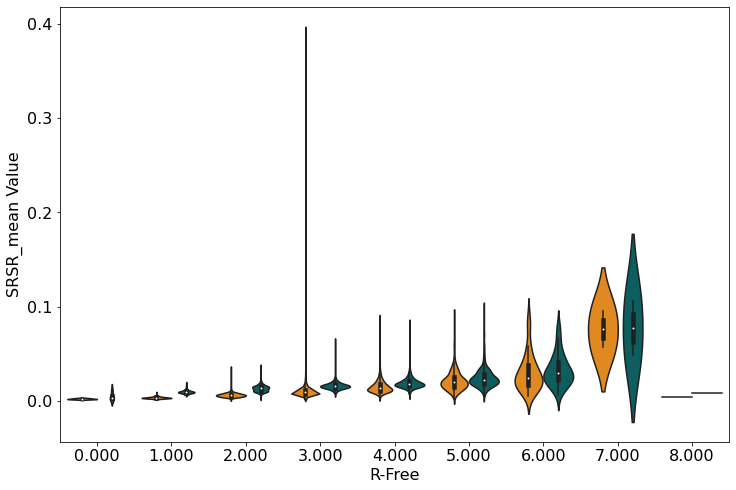

In [19]:
# Loop over the metrics list
for metric in ['RSCCS_mean', 'OPIA_mean', 'EDIA_mean', 'RSR_mean', 'SRSR_mean']:
    # Perform paired t-tests
    print(metric)
    
    # Adjust rfree_group to start at 0.1 and end at 0.35
    metrics_stats['rfree_group'] = ((metrics_stats['RFree'] // 0.05))
    print(metrics_stats.head())
    
    # Reshape the data to have 'close' and 'all' in one column for each metric
    metrics_stats_melted = metrics_stats.melt(id_vars=['rfree_group'], 
                                              value_vars=[f'{metric}_close', f'{metric}_all'], 
                                              var_name='Residue Type', 
                                              value_name=f'{metric}_value')
    

    # Grouping by resolution group and residue type to calculate mean and median
    grouped = metrics_stats_melted.groupby(['rfree_group', 'Residue Type'])[f'{metric}_value']
    
    # Calculating the median and mean for each group
    median_values = grouped.median().unstack()
    mean_values = grouped.mean().unstack()

    print(f"Median values for {metric}:")
    print(median_values)
    print(f"Mean values for {metric}:")
    print(mean_values)
    
    # Plotting the grouped boxplot
    plt.figure(figsize=(12, 8))
    sns.violinplot(x='rfree_group', y=f'{metric}_value', hue='Residue Type', 
                data=metrics_stats_melted, dodge=True, palette=['#FF8C00', '#006C6C'])
    
    plt.xlabel('R-Free', fontsize=16)
    plt.ylabel(f'{metric} Value', fontsize=16)
    plt.legend().remove()
    #plt.legend(labels=['Close Residues', 'All Residues'], fontsize=16)

    # Setting x-axis ticks with 3 significant digits and increasing font size
    plt.gca().set_xticklabels([f"{x:.3f}" for x in plt.gca().get_xticks()], fontsize=16)

    # Setting y-axis tick font size
    plt.tick_params(axis='y', labelsize=16)

    #plt.savefig(f"{metric}_resolution_grouped_boxplot.png")
    plt.show()


RSCCS_mean
Paired t-test for resolution group 1.0:
close:0.982404962071969
far:0.9632454277807024
t-stat = 26.56062315957874, p-value = 1.4933870616783818e-98

Paired t-test for resolution group 1.25:
close:0.975597256509801
far:0.9576712619191885
t-stat = 40.17792608338276, p-value = 6.745560044832106e-225

Paired t-test for resolution group 1.5:
close:0.9672811958043708
far:0.9470401150376375
t-stat = 51.340236688290986, p-value = 0.0

Paired t-test for resolution group 1.75:
close:0.9627569850073501
far:0.943673780391725
t-stat = 61.795511710368295, p-value = 0.0

Paired t-test for resolution group 0.75:
close:0.989196985432005
far:0.9512982976117805
t-stat = 20.59347402644996, p-value = 1.4519376146883629e-37



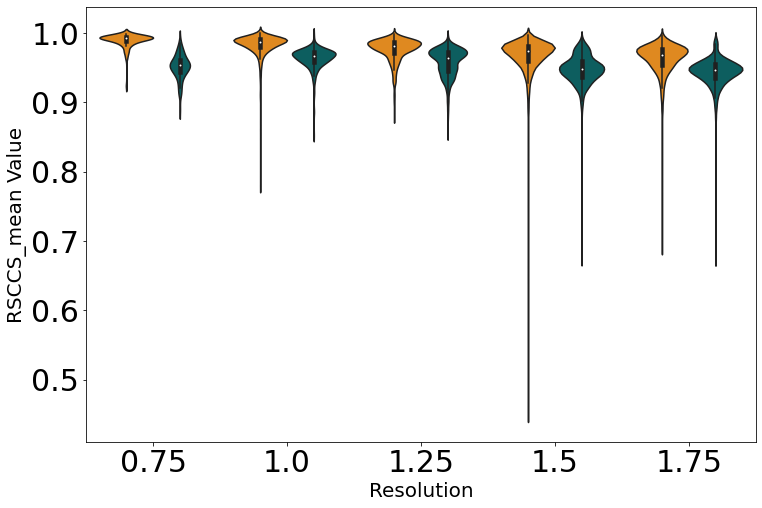

OPIA_mean
Paired t-test for resolution group 1.0:
close:87.8513052323321
far:64.9100577338758
t-stat = 49.06631299347338, p-value = 2.7937998809728617e-196

Paired t-test for resolution group 1.25:
close:91.16871196296468
far:66.34180231054377
t-stat = 85.84622380030419, p-value = 0.0

Paired t-test for resolution group 1.5:
close:89.11594715431586
far:64.50941733229914
t-stat = 111.22785368494007, p-value = 0.0

Paired t-test for resolution group 1.75:
close:85.05397064253813
far:60.60440425809139
t-stat = 124.66892483278042, p-value = 0.0

Paired t-test for resolution group 0.75:
close:66.78031410003116
far:56.50904153572077
t-stat = 7.4244885898251765, p-value = 4.0121698589798586e-11



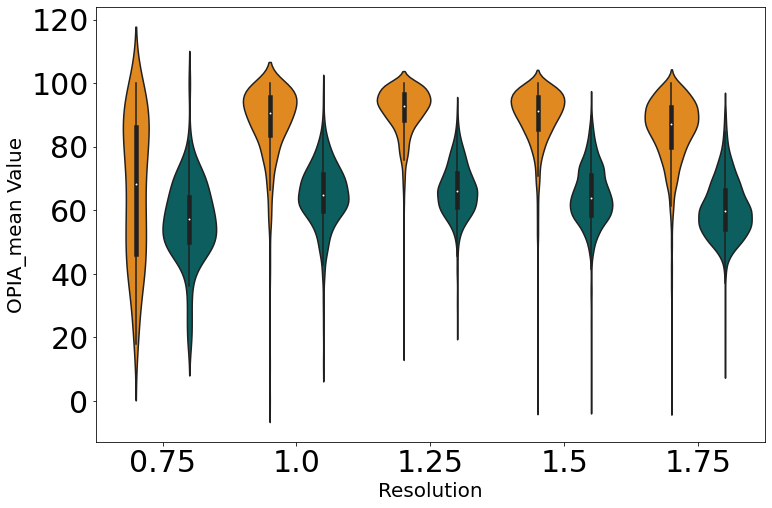

EDIA_mean
Paired t-test for resolution group 1.0:
close:0.8970773683576847
far:0.8000139558829015
t-stat = 32.03403778665455, p-value = 1.1268622144571903e-124

Paired t-test for resolution group 1.25:
close:0.9330548133548923
far:0.8107003970808649
t-stat = 55.891112445779896, p-value = 0.0

Paired t-test for resolution group 1.5:
close:0.9231164809837883
far:0.7950502789678683
t-stat = 70.33797538873951, p-value = 0.0

Paired t-test for resolution group 1.75:
close:0.889364430519042
far:0.7569494371199317
t-stat = 85.43393543799601, p-value = 0.0

Paired t-test for resolution group 0.75:
close:0.828290324415052
far:0.7604128149921165
t-stat = 12.131913600392505, p-value = 2.6823700942253437e-21



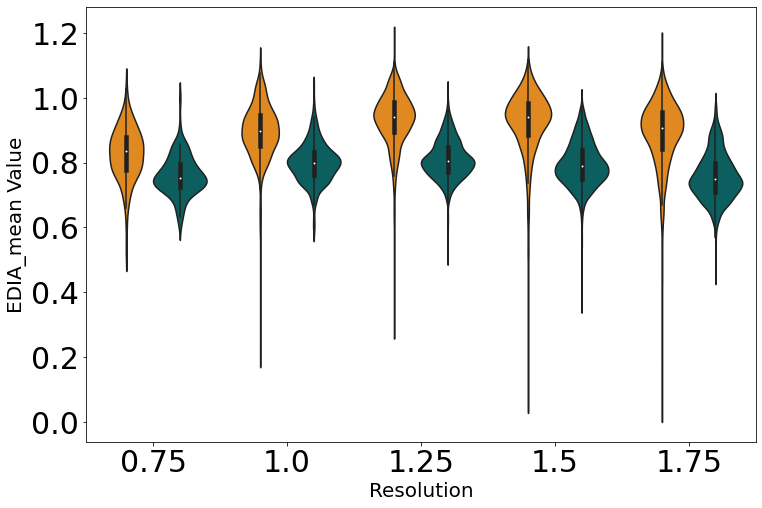

RSR_mean
Paired t-test for resolution group 1.0:
close:0.04245130139910193
far:0.07349497437075268
t-stat = -47.782397385351224, p-value = 2.044493834285086e-191

Paired t-test for resolution group 1.25:
close:0.044192174478959345
far:0.07188342513062618
t-stat = -71.12377570688537, p-value = 0.0

Paired t-test for resolution group 1.5:
close:0.05061140609350231
far:0.07547394154335442
t-stat = -61.28081021504406, p-value = 0.0

Paired t-test for resolution group 1.75:
close:0.05330073891261357
far:0.07451613930784366
t-stat = -79.81742488312685, p-value = 0.0

Paired t-test for resolution group 0.75:
close:0.03665189422793554
far:0.08323371854109159
t-stat = -26.049022383823928, p-value = 4.215222201989791e-46



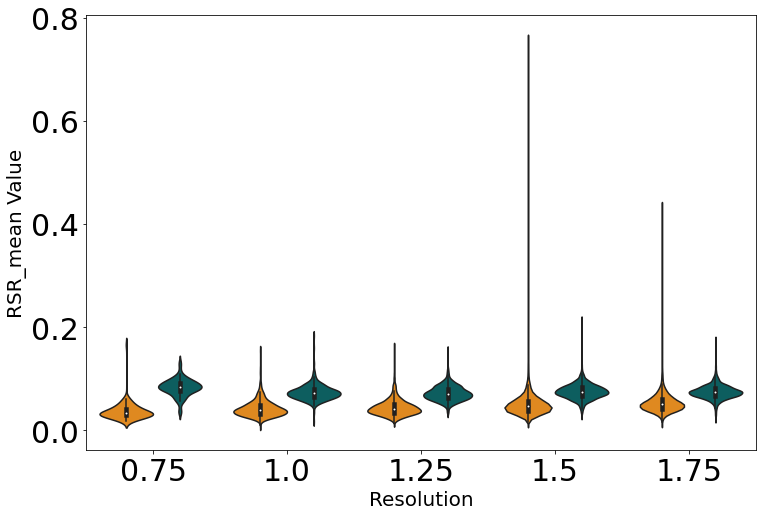

SRSR_mean
Paired t-test for resolution group 1.0:
close:0.004055409041445583
far:0.00964435436235199
t-stat = -69.75925131795451, p-value = 1.4235828124258665e-264

Paired t-test for resolution group 1.25:
close:0.005621493565123095
far:0.011801560197319696
t-stat = -90.52365268747586, p-value = 0.0

Paired t-test for resolution group 1.5:
close:0.007518880692917057
far:0.014202467280315316
t-stat = -40.01487409398155, p-value = 1.6099966864643936e-273

Paired t-test for resolution group 1.75:
close:0.008788003413373687
far:0.015609916317602834
t-stat = -139.11666864284228, p-value = 0.0

Paired t-test for resolution group 0.75:
close:0.00283532620681545
far:0.008890203282003642
t-stat = -39.65334583093196, p-value = 1.4375836984640374e-62



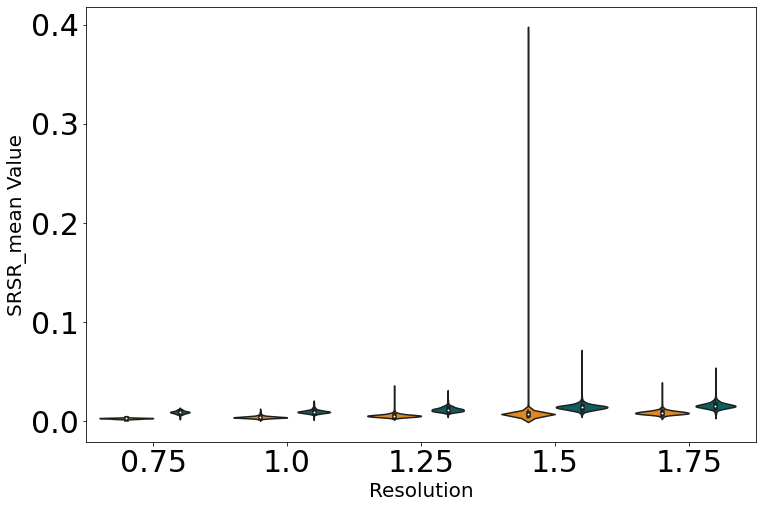

In [22]:
plt.rcParams.update({'font.size': 30})
for metric in ['RSCCS_mean', 'OPIA_mean', 'EDIA_mean', 'RSR_mean', 'SRSR_mean']:
    # Perform paired t-tests
    print(metric)
    metrics_stats['resolution_group'] = (metrics_stats['Resolution'] // 0.25) * 0.25
    
    # Reshape the data to have 'close' and 'all' in one column for each metric
    metrics_stats_melted = metrics_stats.melt(id_vars=['resolution_group'], 
                                              value_vars=[f'{metric}_close', f'{metric}_all'], 
                                              var_name='Residue Type', 
                                              value_name=f'{metric}_value')
    metrics_stats_melted = metrics_stats_melted[metrics_stats_melted['resolution_group'] <= 1.75]
    metrics_stats_melted = metrics_stats_melted[metrics_stats_melted['resolution_group'] > 0.5]

    # Grouping by resolution group and residue type to calculate mean and median
    grouped = metrics_stats_melted.groupby(['resolution_group', 'Residue Type'])[f'{metric}_value']
    
    resolution_groups = metrics_stats_melted['resolution_group'].unique()
    for res_group in resolution_groups:
        print(f"Paired t-test for resolution group {res_group}:")
        
        # Get close and all residue values for the current resolution group
        close_values = metrics_stats_melted[(metrics_stats_melted['resolution_group'] == res_group) & 
                                            (metrics_stats_melted['Residue Type'] == f'{metric}_close')][f'{metric}_value']
        all_values = metrics_stats_melted[(metrics_stats_melted['resolution_group'] == res_group) & 
                                          (metrics_stats_melted['Residue Type'] == f'{metric}_all')][f'{metric}_value']
        
        print(f'close:{close_values.mean()}')
        print(f'far:{all_values.mean()}')
        # Perform paired t-test
        if len(close_values) == len(all_values):  # Ensure the number of values is the same for both groups
            t_stat, p_value = stats.ttest_rel(close_values, all_values)
            print(f"t-stat = {t_stat}, p-value = {p_value}\n")
        else:
            print(f"Unequal number of values for 'close' and 'all' in resolution group {res_group}, t-test skipped.\n")
    
    
    
    # Performing paired t-test between 'close' and 'all'
#     close_values = metrics_stats_melted[metrics_stats_melted['Residue Type'] == f'{metric}_close'][f'{metric}_value']
#     all_values = metrics_stats_melted[metrics_stats_melted['Residue Type'] == f'{metric}_all'][f'{metric}_value']
    
#     t_stat, p_value = stats.ttest_rel(close_values, all_values)
#     print(f"Paired t-test result for {metric}: t-stat = {t_stat}, p-value = {p_value}\n")
    
    # Plotting the grouped boxplot
    plt.figure(figsize=(12, 8))
    sns.violinplot(x='resolution_group', y=f'{metric}_value', hue='Residue Type', 
                data=metrics_stats_melted, dodge=True, palette=['#FF8C00', '#006C6C'])
    
    plt.xlabel('Resolution', fontsize=20)
    plt.ylabel(f'{metric} Value', fontsize=20)
    plt.legend().remove()
    #plt.legend(labels=['Close Residues', 'All Residues'])
    #plt.savefig(f"{metric}_resolution_grouped_boxplot.png")
    plt.show()


RSCCS_mean
Paired t-test for resolution group 0.2:
close:0.9558130934318844
far:0.9386961063626384
t-stat = 85.23148744248067, p-value = 0.0

Paired t-test for resolution group 0.1:
close:0.9776964969944257
far:0.958649532994811
t-stat = 66.68156699481409, p-value = 0.0

Paired t-test for resolution group 0.30000000000000004:
close:0.9220115984028062
far:0.9033129545390326
t-stat = 11.467964249815275, p-value = 5.388605885965767e-27

Paired t-test for resolution group 0.0:
close:0.9947675492788461
far:0.9842024790051
t-stat = 1.581614905309592, p-value = 0.211881349239854



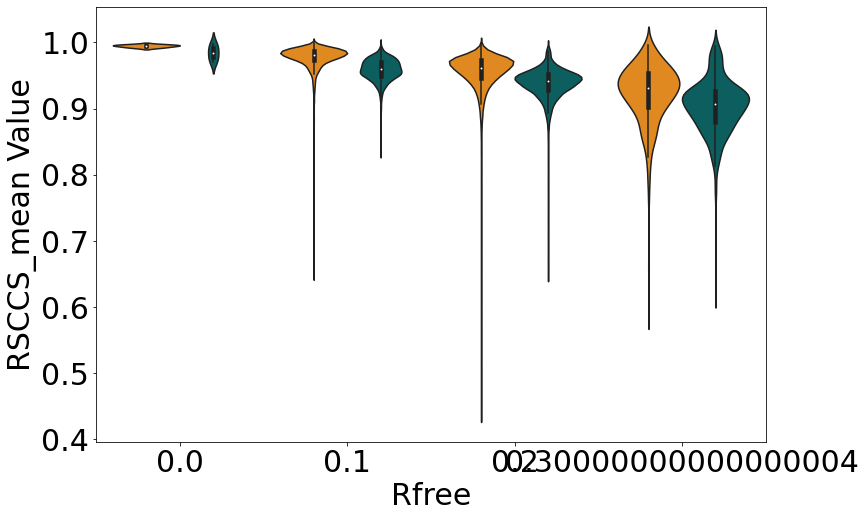

OPIA_mean
Paired t-test for resolution group 0.2:
close:60.666529749745386
far:44.81777307987897
t-stat = 130.65454610224273, p-value = 0.0

Paired t-test for resolution group 0.1:
close:88.03739044408808
far:62.80196303329623
t-stat = 136.86298691683336, p-value = 0.0

Paired t-test for resolution group 0.30000000000000004:
close:28.791062327969104
far:23.788522159214438
t-stat = 12.227915273104001, p-value = 5.062187323572982e-30

Paired t-test for resolution group 0.0:
close:33.20033557692308
far:27.68935592881205
t-stat = 1.2433991181412987, p-value = 0.3020349865632368



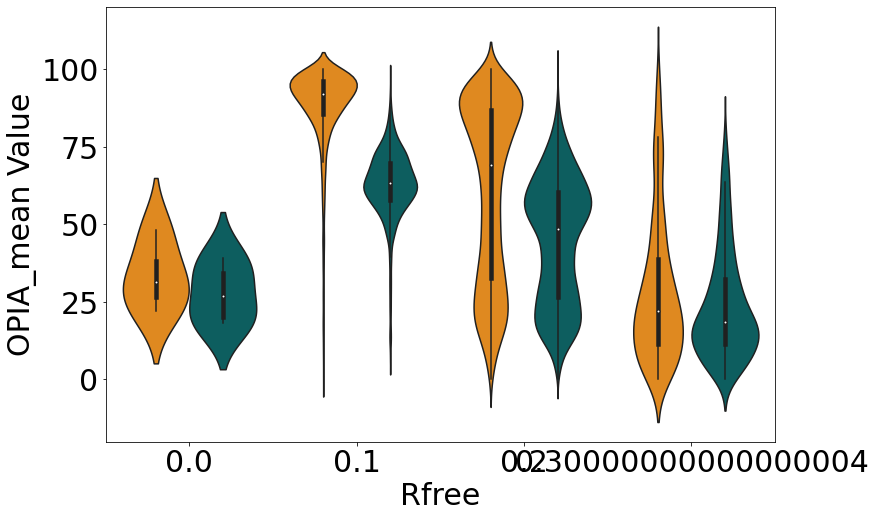

EDIA_mean
Paired t-test for resolution group 0.2:
close:0.7409201429145483
far:0.6370472951063499
t-stat = 128.90278566766358, p-value = 0.0

Paired t-test for resolution group 0.1:
close:0.9179600465786423
far:0.7888211909273001
t-stat = 95.22329241568852, p-value = 0.0

Paired t-test for resolution group 0.30000000000000004:
close:0.49643316198258425
far:0.4379912452058669
t-stat = 17.43626755394242, p-value = 8.373973658820545e-53

Paired t-test for resolution group 0.0:
close:0.7280970220352564
far:0.6836321855616156
t-stat = 4.00677282478133, p-value = 0.027884685488697776



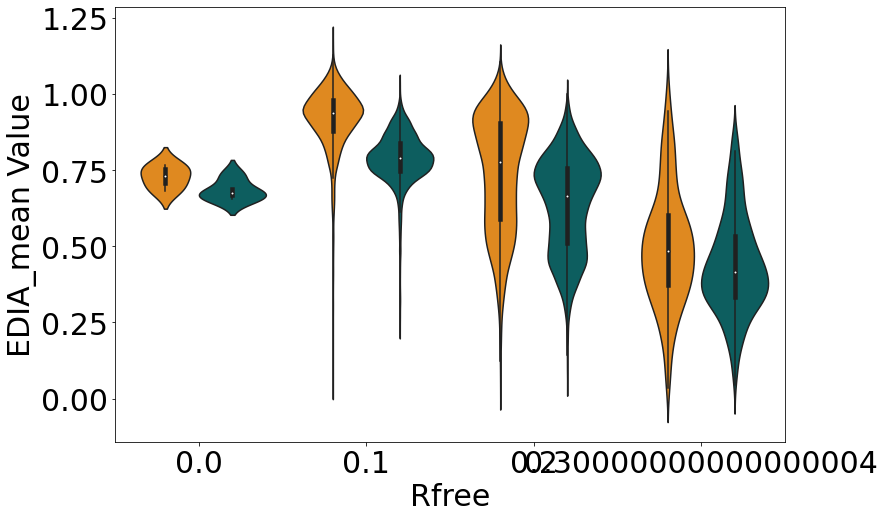

RSR_mean
Paired t-test for resolution group 0.2:
close:0.06181918302381514
far:0.07660593233575912
t-stat = -90.07041466793098, p-value = 0.0

Paired t-test for resolution group 0.1:
close:0.04300577601474108
far:0.07046003837728908
t-stat = -102.9047773394673, p-value = 0.0

Paired t-test for resolution group 0.30000000000000004:
close:0.08918509669227316
far:0.0938358778935156
t-stat = -5.774931242095616, p-value = 1.4063310601604373e-08

Paired t-test for resolution group 0.0:
close:0.0244040268429487
far:0.039209478475885275
t-stat = -1.1922191984536967, p-value = 0.3188843813674285



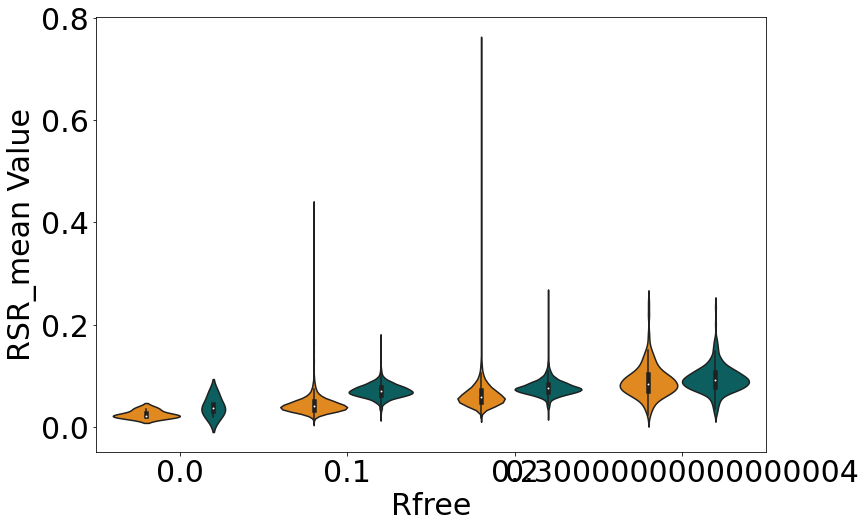

SRSR_mean
Paired t-test for resolution group 0.2:
close:0.011885834207844398
far:0.01700907390178712
t-stat = -97.29286968652742, p-value = 0.0

Paired t-test for resolution group 0.1:
close:0.006210239974088812
far:0.012939231060343889
t-stat = -168.69967774649209, p-value = 0.0

Paired t-test for resolution group 0.30000000000000004:
close:0.022310981761232692
far:0.025230160535408268
t-stat = -13.3317511765694, p-value = 1.378257760239397e-34

Paired t-test for resolution group 0.0:
close:0.0021706590064101998
far:0.004801145604519475
t-stat = -1.355201916356891, p-value = 0.2683637128113213



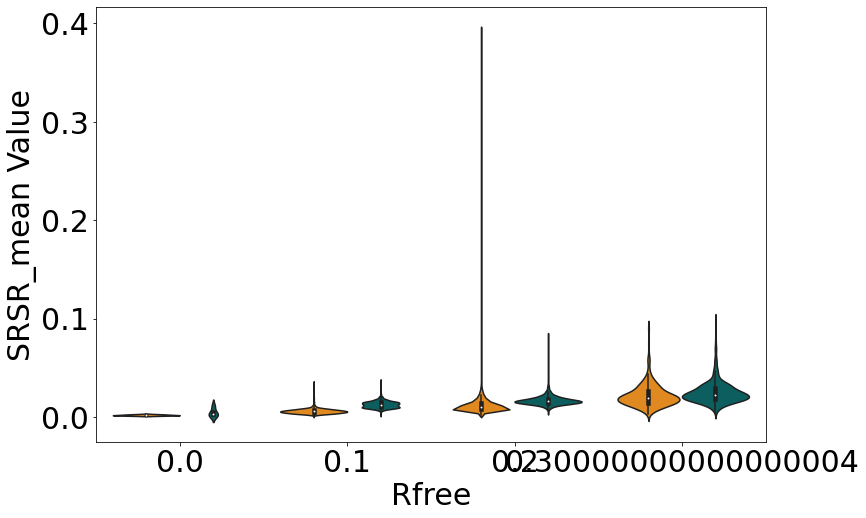

In [24]:
plt.rcParams.update({'font.size': 30})
for metric in ['RSCCS_mean', 'OPIA_mean', 'EDIA_mean', 'RSR_mean', 'SRSR_mean']:
    # Perform paired t-tests
    print(metric)
    metrics_stats['resolution_group'] = (metrics_stats['RFree'] // 0.1) * 0.1
    
    # Reshape the data to have 'close' and 'all' in one column for each metric
    metrics_stats_melted = metrics_stats.melt(id_vars=['resolution_group'], 
                                              value_vars=[f'{metric}_close', f'{metric}_all'], 
                                              var_name='Residue Type', 
                                              value_name=f'{metric}_value')
    metrics_stats_melted = metrics_stats_melted[metrics_stats_melted['resolution_group'] <= 0.39]

    # Grouping by resolution group and residue type to calculate mean and median
    grouped = metrics_stats_melted.groupby(['resolution_group', 'Residue Type'])[f'{metric}_value']
    
    resolution_groups = metrics_stats_melted['resolution_group'].unique()
    for res_group in resolution_groups:
        print(f"Paired t-test for resolution group {res_group}:")
        
        # Get close and all residue values for the current resolution group
        close_values = metrics_stats_melted[(metrics_stats_melted['resolution_group'] == res_group) & 
                                            (metrics_stats_melted['Residue Type'] == f'{metric}_close')][f'{metric}_value']
        all_values = metrics_stats_melted[(metrics_stats_melted['resolution_group'] == res_group) & 
                                          (metrics_stats_melted['Residue Type'] == f'{metric}_all')][f'{metric}_value']
        
        print(f'close:{close_values.mean()}')
        print(f'far:{all_values.mean()}')
        # Perform paired t-test
        if len(close_values) == len(all_values):  # Ensure the number of values is the same for both groups
            t_stat, p_value = stats.ttest_rel(close_values, all_values)
            print(f"t-stat = {t_stat}, p-value = {p_value}\n")
        else:
            print(f"Unequal number of values for 'close' and 'all' in resolution group {res_group}, t-test skipped.\n")
    
    
    
    # Performing paired t-test between 'close' and 'all'
#     close_values = metrics_stats_melted[metrics_stats_melted['Residue Type'] == f'{metric}_close'][f'{metric}_value']
#     all_values = metrics_stats_melted[metrics_stats_melted['Residue Type'] == f'{metric}_all'][f'{metric}_value']
    
#     t_stat, p_value = stats.ttest_rel(close_values, all_values)
#     print(f"Paired t-test result for {metric}: t-stat = {t_stat}, p-value = {p_value}\n")
    
    # Plotting the grouped boxplot
    plt.figure(figsize=(12, 8))
    sns.violinplot(x='resolution_group', y=f'{metric}_value', hue='Residue Type', 
                data=metrics_stats_melted, dodge=True, palette=['#FF8C00', '#006C6C'])
    
    plt.xlabel('Rfree', fontsize=30)
    plt.ylabel(f'{metric} Value', fontsize=30)
    plt.legend().remove()
    #plt.legend(labels=['Close Residues', 'All Residues'])
    #plt.savefig(f"{metric}_resolution_grouped_boxplot.png")
    plt.show()


In [271]:
mean = rotamer_sum[f'per_all_outlier'].mean()
median = rotamer_sum[f'per_all_outlier'].median()
std_dev = rotamer_sum[f'per_all_outlier'].std()
iqr = rotamer_sum[f'per_all_outlier'].quantile(0.75) - rotamer_sum[f'per_all_outlier'].quantile(0.25)
print('ALL:')
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Standard Deviation: {std_dev}")
print(f"IQR: {iqr}")

mean = rotamer_sum[f'per_close_outlier'].mean()
median = rotamer_sum[f'per_close_outlier'].median()
std_dev = rotamer_sum[f'per_close_outlier'].std()
iqr = rotamer_sum[f'per_close_outlier'].quantile(0.75) - rotamer_sum[f'per_close_outlier'].quantile(0.25)

print('CLOSE:')
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Standard Deviation: {std_dev}")
print(f"IQR: {iqr}")

t_stat, p_value = ttest_rel(rotamer_sum[f'per_all_outlier'], rotamer_sum[f'per_close_outlier'])

# Print the results of the paired t-test
print(f'Paired t-test results on outlier:')
print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

ALL:
Mean: 0.02343699643555959
Median: 0.015037593984962405
Standard Deviation: 0.02701457756212478
IQR: 0.020819490586932447
CLOSE:
Mean: 0.02313118335082224
Median: 0.0
Standard Deviation: 0.047119292278244844
IQR: 0.04118694224811578
Paired t-test results on outlier:
T-statistic: 0.8976459647279902
P-value: 0.36938820986794085


In [272]:
mean = rotamer_sum[f'per_all_allowed'].mean()
median = rotamer_sum[f'per_all_allowed'].median()
std_dev = rotamer_sum[f'per_all_allowed'].std()
iqr = rotamer_sum[f'per_all_allowed'].quantile(0.75) - rotamer_sum[f'per_all_allowed'].quantile(0.25)
print('ALL:')
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Standard Deviation: {std_dev}")
print(f"IQR: {iqr}")

mean = rotamer_sum[f'per_close_allowed'].mean()
median = rotamer_sum[f'per_close_allowed'].median()
std_dev = rotamer_sum[f'per_close_allowed'].std()
iqr = rotamer_sum[f'per_close_allowed'].quantile(0.75) - rotamer_sum[f'per_close_allowed'].quantile(0.25)

print('CLOSE:')
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Standard Deviation: {std_dev}")
print(f"IQR: {iqr}")

t_stat, p_value = ttest_rel(rotamer_sum[f'per_all_allowed'], rotamer_sum[f'per_close_allowed'])

# Print the results of the paired t-test
print(f'Paired t-test results on allowed:')
print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

ALL:
Mean: 0.04178705956186332
Median: 0.03546099290780142
Standard Deviation: 0.02633470784897167
IQR: 0.0270151960123296
CLOSE:
Mean: 0.048214824911505826
Median: 0.03571428571428571
Standard Deviation: 0.06360568138077453
IQR: 0.07692307692307693
Paired t-test results on allowed:
T-statistic: -13.582568178425714
P-value: 8.791833375090581e-42


In [238]:
b = glob.glob('/Users/stephaniewanko/Downloads/vanderbilt/pdbbias/*_B_factors.csv')

# Initialize a list to store the DataFrames
dfs = []

# Loop through each file and read it into a DataFrame
for file in b:
    # Read the CSV file into a DataFrame
    df = pd.read_csv(file)
    
    # Extract the first four digits of the file name for the PDB column
    pdb_id = os.path.basename(file)[:4]  # Get the first four characters from the filename
    
    # Add a new column 'PDB' with the extracted PDB ID
    df['PDB'] = pdb_id
    
    # Append the DataFrame to the list
    dfs.append(df)

# Concatenate all DataFrames into a single DataFrame
all_bfactor = pd.concat(dfs, ignore_index=True)

# Display the first few rows of the combined DataFrame
print(all_bfactor.head())


    PDB resi   resn  chain   b_factor num_altlocs
0  4ZIZ    1  'MET'  ['A']  35.811250           1
1  4ZIZ    2  'LYS'  ['A']  46.115556           1
2  4ZIZ    3  'THR'  ['A']  30.875714           1
3  4ZIZ    4  'PRO'  ['A']  30.968571           1
4  4ZIZ    5  'ILE'  ['A']  35.527500           1


In [239]:
all_bfactor['chain'] = all_bfactor['chain'].apply(lambda x: ''.join(x).replace('[','').replace(']','').replace("'",""))

In [240]:
all_bfactor.head()

,PDB,resi,resn,chain,b_factor,num_altlocs
0,4ZIZ,1,'MET',A,35.811250,1
1,4ZIZ,2,'LYS',A,46.115556,1
2,4ZIZ,3,'THR',A,30.875714,1
3,4ZIZ,4,'PRO',A,30.968571,1
4,4ZIZ,5,'ILE',A,35.527500,1


In [241]:
results = []
for pdb, group in all_bfactor.groupby('PDB'):
        # Total number of residues
        total_residues = len(group['resi'])
        
        # Count residues with more than one altloc
        altloc_residues = (group['num_altlocs'] > 1).sum()

        # Calculate the proportion of residues with altlocs
        proportion_altlocs = altloc_residues / total_residues if total_residues > 0 else 0

        # Store the result for the current PDB
        results.append({
            'PDB': pdb,
            'total_residues': total_residues,
            'altloc_residues': altloc_residues,
            'proportion_altlocs': proportion_altlocs
        })

    # Create a DataFrame from the results
altloc_prop = pd.DataFrame(results)

In [221]:
sorted_result_df = altloc_prop.sort_values(by='proportion_altlocs', ascending=False)

In [222]:
sorted_result_df.head()

,PDB,total_residues,altloc_residues,proportion_altlocs
26387,6UG2,5,5,1.0
27668,8RAD,152,152,1.0
27643,8R9D,152,152,1.0
27644,8R9E,152,152,1.0
27645,8R9F,152,152,1.0


In [225]:
# Use glob to find all *_5.0_closeres.csv files in the specified directory
b = glob.glob('/Users/stephaniewanko/Downloads/vanderbilt/pdbbias/*_5.0_closeres.csv')

# Initialize a list to store the DataFrames
dfs = []

# Loop through each file and read it into a DataFrame
for file in b:
    try:
    #if '_STP_' in file:
    #    continue
    # Read the CSV file into a DataFrame
        df = pd.read_csv(file)
    except:
        continue
    
    # Extract the first four digits of the file name for the PDB column
    pdb_id = os.path.basename(file)[:4]  # Get the first four characters from the filename
    
    # Add a new column 'PDB' with the extracted PDB ID
    df['PDB'] = pdb_id
    
    # Append the DataFrame to the list
    dfs.append(df)

# Concatenate all DataFrames into a single DataFrame
close_resi= pd.concat(dfs, ignore_index=True)

# Display the first few rows of the combined DataFrame
print(close_resi.head())


   resi chain   PDB  distance
0   167     A  2DXX  4.306663
1  1582     A  2DXX  4.251570
2  1515     A  2DXX  4.531591
3   164     A  2DXX  4.962897
4   235     A  2DXX  3.058724


In [226]:
all_bfactor.head()

,PDB,resi,resn,chain,b_factor,num_altlocs
0,4ZIZ,1,'MET',A,35.811250,1
1,4ZIZ,2,'LYS',A,46.115556,1
2,4ZIZ,3,'THR',A,30.875714,1
3,4ZIZ,4,'PRO',A,30.968571,1
4,4ZIZ,5,'ILE',A,35.527500,1


In [227]:
close_resi.head()

,resi,chain,PDB,distance
0,167,A,2DXX,4.306663
1,1582,A,2DXX,4.251570
2,1515,A,2DXX,4.531591
3,164,A,2DXX,4.962897
4,235,A,2DXX,3.058724


In [228]:
close_resi_bfactor = pd.merge(close_resi, all_bfactor[['resi', 'chain', 'PDB', 'num_altlocs']], 
                       on=['resi', 'chain', 'PDB'], how='inner')

In [204]:
# merged_data = []
# # Loop through each row in the 'close_resi' DataFrame
# for index, row in close_resi.iterrows():
#     # Filter the 'all_bfactor' DataFrame for matching 'resi' and 'chain' values
#     matching_row = all_bfactor[(all_bfactor['resi'] == row['resi']) & (all_bfactor['chain'] == row['chain'])]
    
#     # If there is a match, append the merged data
#     if not matching_row.empty:
#         # Merge the data (you can modify this to add more columns if needed)
#         merged_row = row.append(matching_row[['num_altlocs']].iloc[0])
#         merged_data.append(merged_row)

# # Convert the merged data into a DataFrame
# close_resi_bfactor = pd.DataFrame(merged_data)

In [229]:
close_resi_bfactor = close_resi_bfactor.drop_duplicates()

In [230]:
results = []
for pdb, group in close_resi_bfactor.groupby('PDB'):
        # Total number of residues
        total_residues = len(group['resi'].unique())
        
        # Count residues with more than one altloc
        altloc_residues = (group['num_altlocs'] > 1).sum()

        # Calculate the proportion of residues with altlocs
        proportion_altlocs = altloc_residues / total_residues if total_residues > 0 else 0

        # Store the result for the current PDB
        results.append({
            'PDB': pdb,
            'total_residues': total_residues,
            'altloc_residues': altloc_residues,
            'proportion_altlocs': proportion_altlocs
        })

    # Create a DataFrame from the results
altloc_prop_close = pd.DataFrame(results)

In [231]:
altloc_prop = altloc_prop[altloc_prop['PDB'].isin(altloc_prop_close['PDB'])]

In [209]:
#altloc_prop_close.sort_values(by='proportion_altlocs', ascending=False)

In [210]:
# plt.figure(figsize=(8, 6))
# plt.hist(altloc_prop['proportion_altlocs'], bins=10, color='#006C6C', alpha=0.7, density=True)
# plt.hist(altloc_prop_close['proportion_altlocs'], bins=20, color='#FF8C00', alpha=0.7, density=True)
# plt.xlabel('Proportion Alternate Locations', fontsize=12)
# plt.ylabel('Frequency', fontsize=12)

In [256]:
residue_metrics['PDB'] =residue_metrics['PDB'].str.upper()

In [156]:
# Use glob to find all files in the specified directory
fpocket_files = glob.glob('/Users/stephaniewanko/Downloads/vanderbilt/pdbbias/fpocket/*')

# Initialize a list to store the DataFrames
fpocket_dfs = []

# Loop through each file and read it into a DataFrame
for file in fpocket_files:
    try:
        # Read the file into a DataFrame
        df = pd.read_csv(file, sep=',')
    except:
        continue

    # Append the DataFrame to the list
    fpocket_dfs.append(df)

# Concatenate all DataFrames into a single DataFrame
all_fpocket_data = pd.concat(fpocket_dfs, ignore_index=True)

# Display the first few rows of the combined DataFrame


  PDB ID  Pocket                Attribute   Value
0   7z8w       1                    Score   0.819
1   7z8w       1       Druggability Score   0.512
2   7z8w       1  Number of Alpha Spheres  81.000
3   7z8w       1               Total SASA  73.579
4   7z8w       1               Polar SASA  32.520


In [157]:
all_fpocket_data.rename(columns={'PDB ID': 'PDB'}, inplace=True)

In [159]:
# Use glob to find all files in the specified directory
fpocket_files = glob.glob('/Users/stephaniewanko/Downloads/vanderbilt/pdbbias/fpocket/resi/*_fpocket_resi.csv')

# Initialize a list to store the DataFrames
fpocket_dfs = []

# Loop through each file and read it into a DataFrame
for file in fpocket_files:
    try:
        # Read the file into a DataFrame
        df = pd.read_csv(file, sep=',')
    except:
        continue

    # Append the DataFrame to the list
    fpocket_dfs.append(df)

# Concatenate all DataFrames into a single DataFrame
pocket_resi = pd.concat(fpocket_dfs, ignore_index=True)

# Display the first few rows of the combined DataFrame
print(pocket_resi.head())

    PDB Resi
0  5a11   80
1  5a11  187
2  5a11  132
3  5a11  253
4  5a11   80


In [161]:
pivot_fpocket_data = all_fpocket_data.pivot_table(index=['PDB', 'Pocket'], columns='Attribute', values='Value').reset_index()

# Display the first few rows of the pivoted DataFrame
print(pivot_fpocket_data.head())

Attribute   PDB  Pocket  Alpha Sphere max dist  Alpha sphere density  \
0          1914       1                 10.980                 4.858   
1          18gs       1                 17.448                 7.001   
2          190l       1                 19.513                 6.913   
3          191l       1                 10.680                 4.482   
4          192l       1                 23.381                 9.192   

Attribute  Apolar SASA  Apolar alpha sphere proportion  Charge score  \
0               62.302                           0.333           1.0   
1              108.092                           0.176           0.0   
2              106.271                           0.207           0.0   
3               68.181                           0.263          -1.0   
4              191.280                           0.223           0.0   

Attribute  Druggability Score  Flexibility  Hydrophobicity score  ...  \
0                       0.006        0.181                -7.

In [165]:
pivot_fpocket_data = pivot_fpocket_data[pivot_fpocket_data['PDB']!='5jj1']

(array([1.5423e+04, 7.4089e+04, 1.5918e+04, 1.6060e+03, 3.9200e+02,
        1.5900e+02, 6.4000e+01, 4.6000e+01, 2.9000e+01, 2.6000e+01]),
 array([-0.315 ,  0.2126,  0.7402,  1.2678,  1.7954,  2.323 ,  2.8506,
         3.3782,  3.9058,  4.4334,  4.961 ]),
 <BarContainer object of 10 artists>)

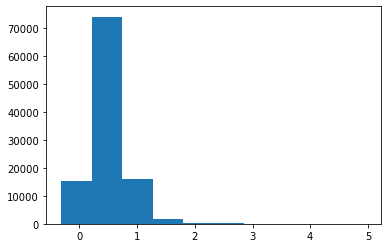

In [176]:
plt.hist(pivot_fpocket_data['Score'])

In [193]:
pivot_fpocket_data2 = pivot_fpocket_data[pivot_fpocket_data['Volume']>300]

In [194]:
pivot_fpocket_data2['Volume'].describe()

count    29790.000000
mean      1244.179252
std       1086.195856
min        300.401000
25%        633.276500
50%        934.262000
75%       1427.581250
max      26127.926000
Name: Volume, dtype: float64

In [187]:
high_score_pdbs = pivot_fpocket_data2['PDB'].unique()

In [196]:
high_score_pdbs = pivot_fpocket_data2[~pivot_fpocket_data2['PDB'].isin(close_resi['PDB'])]['PDB'].unique()

In [197]:
pocket_resi_filtered = pocket_resi[pocket_resi['PDB'].isin(high_score_pdbs)]

In [198]:
pocket_resi_filtered.to_csv('pocket_resi_close.csv')

In [200]:
len(high_score_pdbs)

29422

In [49]:
# Use glob to find all files in the specified directory
fpocket_files = glob.glob('/Users/stephaniewanko/Downloads/vanderbilt/pdbbias/rotamer/sidechain/outliers/*csv')

# Initialize a list to store the DataFrames
fpocket_dfs = []

# Loop through each file and read it into a DataFrame
for file in fpocket_files:
    try:
        # Read the file into a DataFrame
        df = pd.read_csv(file, sep=',')
    except:
        continue
    df['PDB'] = file[78:82]

    # Append the DataFrame to the list
    fpocket_dfs.append(df)

# Concatenate all DataFrames into a single DataFrame
outliers = pd.concat(fpocket_dfs, ignore_index=True)

# Display the first few rows of the combined DataFrame


In [50]:
outliers = outliers.dropna(subset=['resi'])
outliers['resi'] = outliers['resi'].astype(int)
outliers.head()

,index,residue,occupancy,score%,chi1,chi2,chi3,chi4,evaluation,rotamer,PDB,chain,resi,is_close
0,14,B 15 ILE,1.0,0.0,186.4,262.9,NaN,NaN,OUTLIER,OUTLIER,7LE5,B,15,False
1,19,B 23 LEU,1.0,0.7,221.3,39.4,NaN,NaN,Allowed,tp,7LE5,B,23,True
2,26,B 32 VAL,1.0,1.4,195.8,NaN,NaN,NaN,Allowed,t,7LE5,B,32,True
3,65,B 80 THR,1.0,1.7,173.3,NaN,NaN,NaN,Allowed,t,7LE5,B,80,False
4,118,A 41 ARG,1.0,1.7,326.6,190.5,216.9,155.7,Allowed,mtt180,7LE5,A,41,False


In [51]:
# Use glob to find all files in the specified directory
fpocket_files = glob.glob('/Users/stephaniewanko/Downloads/vanderbilt/pdbbias/metrics/*txt')

# Initialize a list to store the DataFrames
fpocket_dfs = []

# Loop through each file and read it into a DataFrame
for file in fpocket_files:
    try:
        # Read the file into a DataFrame
        df = pd.read_csv(file, sep='\t')
    except:
        continue
    df['PDB'] = file[59:63]

    # Append the DataFrame to the list
    fpocket_dfs.append(df)

# Concatenate all DataFrames into a single DataFrame
metrics = pd.concat(fpocket_dfs, ignore_index=True)

# Display the first few rows of the combined DataFrame


In [52]:
metrics['PDB'] = metrics['PDB'].str.upper()
metrics = metrics.rename(columns={'seqNum': 'resi'})
metrics = metrics.rename(columns={'AsymID': 'chain'})

In [53]:
metrics.head()

,compID,resi,chain,RSCCS,OPIA,EDIAm,RSR,SRSR,PDB
0,SER,2,A,0.886482,66.666667,0.363475,0.109673,0.011768,4QD7
1,LEU,3,A,0.964017,87.500000,0.943052,0.065955,0.007633,4QD7
2,TRP,4,A,0.980883,100.000000,1.053040,0.043646,0.005272,4QD7
3,ARG,5,A,0.979031,100.000000,1.056610,0.039296,0.006045,4QD7
4,GLN,6,A,0.935522,77.777778,0.962094,0.087280,0.007361,4QD7


In [54]:
metrics_outliers = pd.merge(outliers, metrics, on=['PDB', 'resi', 'chain'])
# Create a new 'is_close' column to indicate the grouping for hue
metrics_outliers['is_close'] = metrics_outliers['is_close'].map({False: 'All', True: 'Binding Site'})

In [55]:
metrics_outliers.head()

,index,residue,occupancy,score%,chi1,chi2,chi3,chi4,evaluation,rotamer,PDB,chain,resi,is_close,compID,RSCCS,OPIA,EDIAm,RSR,SRSR
0,14,B 15 ILE,1.0,0.0,186.4,262.9,NaN,NaN,OUTLIER,OUTLIER,7LE5,B,15,All,ILE,0.926902,75.0000,0.648752,0.082136,0.011973
1,19,B 23 LEU,1.0,0.7,221.3,39.4,NaN,NaN,Allowed,tp,7LE5,B,23,Binding Site,LEU,0.938243,75.0000,0.886244,0.074257,0.009318
2,26,B 32 VAL,1.0,1.4,195.8,NaN,NaN,NaN,Allowed,t,7LE5,B,32,Binding Site,VAL,0.950930,71.4286,0.784763,0.067189,0.012016
3,65,B 80 THR,1.0,1.7,173.3,NaN,NaN,NaN,Allowed,t,7LE5,B,80,All,THR,0.970164,100.0000,1.032950,0.056795,0.009145
4,118,A 41 ARG,1.0,1.7,326.6,190.5,216.9,155.7,Allowed,mtt180,7LE5,A,41,All,ARG,0.811269,36.3636,0.053823,0.132345,0.012551


In [56]:
metrics_allowed = metrics_outliers[metrics_outliers['evaluation'] == 'Allowed']
metrics_outliers2 = metrics_outliers[metrics_outliers['evaluation'] == 'OUTLIER']

In [69]:
metrics_outliers = metrics_outliers[metrics_outliers['EDIAm']<=1.0]

Text(0, 0.5, 'Density')

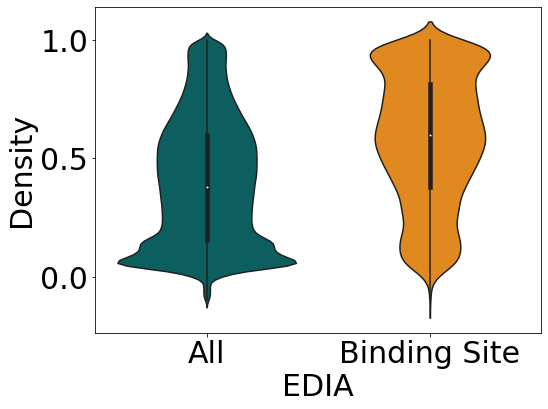

In [70]:
# Set the figure size
plt.figure(figsize=(8, 6))


# Plot the boxplots side by side with the 'hue' argument
sns.violinplot(x='is_close', y='EDIAm', data=metrics_outliers, palette=['#006C6C', '#FF8C00'])

# Set labels
plt.xlabel('EDIA')
plt.ylabel('Density')

# Add legend and adjust fontsize

Text(0, 0.5, 'Density')

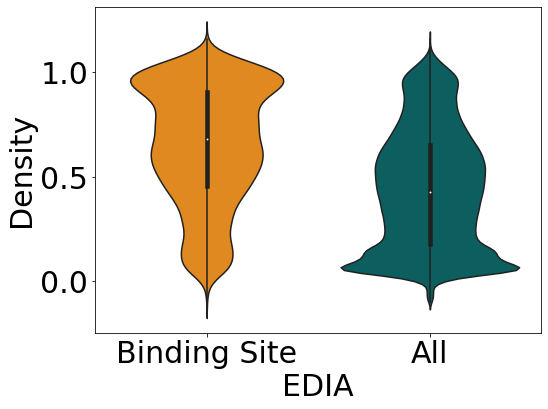

In [58]:
# Set the figure size
plt.figure(figsize=(8, 6))



# Plot the boxplots side by side with the 'hue' argument
sns.violinplot(x='is_close', y='EDIAm', data=metrics_allowed, palette=['#FF8C00', '#006C6C'])

# Set labels
plt.xlabel('EDIA')
plt.ylabel('Density')

# Add legend and adjust fontsize

In [61]:
len(metrics_outliers2.index)
#len(metrics_allowed.index)

737711

In [62]:
from scipy import stats

# Calculate the means of each group
mean_all = metrics_outliers2[metrics_outliers2['is_close'] == 'All']['EDIAm'].dropna().mean()
mean_binding = metrics_outliers2[metrics_outliers2['is_close'] == 'Binding Site']['EDIAm'].dropna().mean()

# Perform the independent t-test
t_stat, p_value = stats.ttest_ind(
    metrics_outliers2[metrics_outliers2['is_close'] == 'All']['EDIAm'].dropna(),
    metrics_outliers2[metrics_outliers2['is_close'] == 'Binding Site']['EDIAm'].dropna()
)

# Print the results
print(f"Mean of 'All' group: {mean_all}")
print(f"Mean of 'Binding Site' group: {mean_binding}")
print(f"t-stat = {t_stat}, p-value = {p_value}\n")

Mean of 'All' group: 0.3624975443218526
Mean of 'Binding Site' group: 0.53823637458336
t-stat = -54.67723518871105, p-value = 0.0



In [63]:
from scipy import stats

# Calculate the means of each group
mean_all = metrics_allowed[metrics_allowed['is_close'] == 'All']['EDIAm'].dropna().mean()
mean_binding = metrics_allowed[metrics_allowed['is_close'] == 'Binding Site']['EDIAm'].dropna().mean()

# Perform the independent t-test
t_stat, p_value = stats.ttest_ind(
    metrics_allowed[metrics_allowed['is_close'] == 'All']['EDIAm'].dropna(),
    metrics_allowed[metrics_allowed['is_close'] == 'Binding Site']['EDIAm'].dropna()
)

# Print the results
print(f"Mean of 'All' group: {mean_all}")
print(f"Mean of 'Binding Site' group: {mean_binding}")
print(f"t-stat = {t_stat}, p-value = {p_value}\n")


Mean of 'All' group: 0.4389686307168917
Mean of 'Binding Site' group: 0.6513196208012848
t-stat = -83.51735003856507, p-value = 0.0



In [64]:
metrics_res = pd.read_csv('metrics_stats.csv')

In [65]:
metrics_res.head()

,Unnamed: 0,PDB,total_residues_all,altloc_residues_all,proportion_altlocs_all,total_residues_close,altloc_residues_close,proportion_altlocs_close,Unnamed: 0.1,RFree,Rwork,Resolution,Spacegroup
0,0,102D,24,0,0.000000,12,0,0.000000,24941,NaN,NaN,2.20,P 21 21 21
1,1,108M,154,2,0.012987,9,3,0.333333,18045,0.226,NaN,2.67,P 6
2,2,109D,24,0,0.000000,12,0,0.000000,31965,NaN,NaN,2.00,P 21 21 21
3,3,10GS,416,0,0.000000,17,0,0.000000,34098,0.214,NaN,2.20,C 1 2 1
4,4,110D,6,0,0.000000,3,0,0.000000,14096,NaN,NaN,1.90,P 41 21 2


In [66]:

    metrics_res['resolution_group'] = (metrics_res['Resolution'] // 0.25) * 0.25
    print(metrics_res.head())
    # Reshape the data to have 'close' and 'all' in one column for each metric

   Unnamed: 0   PDB  total_residues_all  altloc_residues_all  \
0           0  102D                  24                    0   
1           1  108M                 154                    2   
2           2  109D                  24                    0   
3           3  10GS                 416                    0   
4           4  110D                   6                    0   

   proportion_altlocs_all  total_residues_close  altloc_residues_close  \
0                0.000000                    12                      0   
1                0.012987                     9                      3   
2                0.000000                    12                      0   
3                0.000000                    17                      0   
4                0.000000                     3                      0   

   proportion_altlocs_close  Unnamed: 0.1  RFree  Rwork  Resolution  \
0                  0.000000         24941    NaN    NaN        2.20   
1                  0.333333 

In [71]:
metrics_stats_melted = metrics_res.melt(id_vars=['resolution_group'], 
                                              value_vars=[f'proportion_altlocs_close', f'proportion_altlocs_all'], 
                                              var_name='Close_Dist', 
                                              value_name=f'value')


In [72]:
metrics_stats_melted = metrics_stats_melted[metrics_stats_melted['resolution_group'] <= 1.75]
mask = metrics_stats_melted['value'] > 1
metrics_stats_melted.loc[mask, 'value'] = np.random.uniform(0, 1, size=mask.sum())

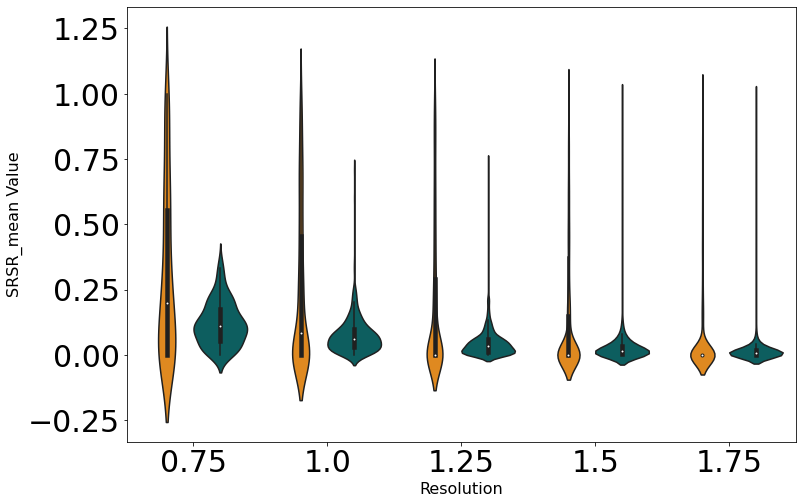

In [73]:

    
    # Performing paired t-test between 'close' and 'all'
#     close_values = metrics_stats_melted[metrics_stats_melted['Residue Type'] == f'{metric}_close'][f'{metric}_value']
#     all_values = metrics_stats_melted[metrics_stats_melted['Residue Type'] == f'{metric}_all'][f'{metric}_value']
    
#     t_stat, p_value = stats.ttest_rel(close_values, all_values)
#     print(f"Paired t-test result for {metric}: t-stat = {t_stat}, p-value = {p_value}\n")
    
    # Plotting the grouped boxplot
    plt.figure(figsize=(12, 8))
    sns.violinplot(x='resolution_group', y=f'value', hue='Close_Dist', 
                data=metrics_stats_melted, dodge=True, palette=['#FF8C00', '#006C6C'])
    
    plt.xlabel('Resolution', fontsize=16)
    plt.ylabel(f'{metric} Value', fontsize=16)
    plt.legend(labels=['Close Residues', 'All Residues'])
    plt.legend().remove()
    plt.savefig(f"{metric}_resolution_grouped_boxplot.png")

In [78]:
altloc_combined = pd.read_csv('metrics_stats.csv')

In [79]:
altloc_combined.head()

,Unnamed: 0,PDB,total_residues_all,altloc_residues_all,proportion_altlocs_all,total_residues_close,altloc_residues_close,proportion_altlocs_close,Unnamed: 0.1,RFree,Rwork,Resolution,Spacegroup
0,0,102D,24,0,0.000000,12,0,0.000000,24941,NaN,NaN,2.20,P 21 21 21
1,1,108M,154,2,0.012987,9,3,0.333333,18045,0.226,NaN,2.67,P 6
2,2,109D,24,0,0.000000,12,0,0.000000,31965,NaN,NaN,2.00,P 21 21 21
3,3,10GS,416,0,0.000000,17,0,0.000000,34098,0.214,NaN,2.20,C 1 2 1
4,4,110D,6,0,0.000000,3,0,0.000000,14096,NaN,NaN,1.90,P 41 21 2


In [82]:
# Combine the values from both columns for normalization
combined_values = pd.concat([altloc_combined['proportion_altlocs_all'], altloc_combined['proportion_altlocs_close']])

# Find the global min and max values for normalization
global_min = combined_values.min()
global_max = combined_values.max()

# Normalize both 'proportion_altlocs_all' and 'proportion_altlocs_close' based on the global min and max
altloc_combined['proportion_altlocs_all_normalized'] = (altloc_combined['proportion_altlocs_all'] - global_min) / (global_max - global_min)
altloc_combined['proportion_altlocs_close_normalized'] = (altloc_combined['proportion_altlocs_close'] - global_min) / (global_max - global_min)

proportion_altlocs
Number of values in each group:
resolution_group  Close_Dist                         
0.75              proportion_altlocs_all_normalized       101
                  proportion_altlocs_close_normalized     101
1.00              proportion_altlocs_all_normalized       529
                  proportion_altlocs_close_normalized     529
1.25              proportion_altlocs_all_normalized      1242
                  proportion_altlocs_close_normalized    1242
1.50              proportion_altlocs_all_normalized      2669
                  proportion_altlocs_close_normalized    2669
1.75              proportion_altlocs_all_normalized      3443
                  proportion_altlocs_close_normalized    3443
dtype: int64
Median values for proportion_altlocs:
Close_Dist        proportion_altlocs_all_normalized  \
resolution_group                                      
0.75                                       0.004677   
1.00                                       0.002651   
1.25

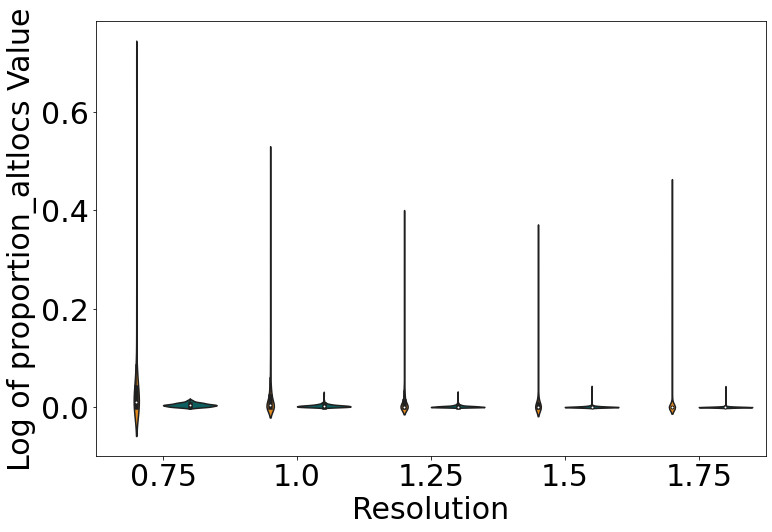

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

for metric in ['proportion_altlocs']:
    # Perform paired t-tests
    print(metric)
    metrics_stats = altloc_combined
    metrics_stats['resolution_group'] = (metrics_stats['Resolution'] // 0.25) * 0.25
    
    # Reshape the data to have 'close' and 'all' in one column for each metric
    metrics_stats_melted = metrics_stats.melt(id_vars=['resolution_group'], 
                                              value_vars=[f'{metric}_close_normalized', f'{metric}_all_normalized'], 
                                              var_name='Close_Dist', 
                                              value_name=f'{metric}_value')
    
    metrics_stats_melted = metrics_stats_melted[metrics_stats_melted['resolution_group'] <= 1.75]

    # Log transform the values (add 1 to avoid log(0) issues)
    metrics_stats_melted[f'{metric}_value'] = np.log(metrics_stats_melted[f'{metric}_value'] + 1)

    # Grouping by resolution group and Close_Dist
    grouped = metrics_stats_melted.groupby(['resolution_group', 'Close_Dist'])[f'{metric}_value']
    
    # Count the number of entries in each group
    group_counts = metrics_stats_melted.groupby(['resolution_group', 'Close_Dist']).size()
    print("Number of values in each group:")
    print(group_counts)
    
    # Calculating the median and mean for each group
    median_values = grouped.median().unstack()
    mean_values = grouped.mean().unstack()

    print(f"Median values for {metric}:")
    print(median_values)
    print(f"Mean values for {metric}:")
    print(mean_values)
    
    # Plotting the log-transformed violin plot
    plt.figure(figsize=(12, 8))
    sns.violinplot(x='resolution_group', y=f'{metric}_value', hue='Close_Dist', 
                data=metrics_stats_melted, dodge=True, palette=['#FF8C00', '#006C6C'])
    
    plt.xlabel('Resolution')
    plt.ylabel(f'Log of {metric} Value')
    plt.legend(labels=['Close Residues', 'All Residues'])
    plt.legend().remove()
    plt.show()


proportion_altlocs
RFREE
Median values for proportion_altlocs:
Close_Dist        proportion_altlocs_all_normalized  \
resolution_group                                      
0.0                                        0.000000   
0.1                                        0.001046   
0.2                                        0.000000   
0.3                                        0.000000   

Close_Dist        proportion_altlocs_close_normalized  
resolution_group                                       
0.0                                               0.0  
0.1                                               0.0  
0.2                                               0.0  
0.3                                               0.0  
Mean values for proportion_altlocs:
Close_Dist        proportion_altlocs_all_normalized  \
resolution_group                                      
0.0                                        0.001537   
0.1                                        0.001686   
0.2           

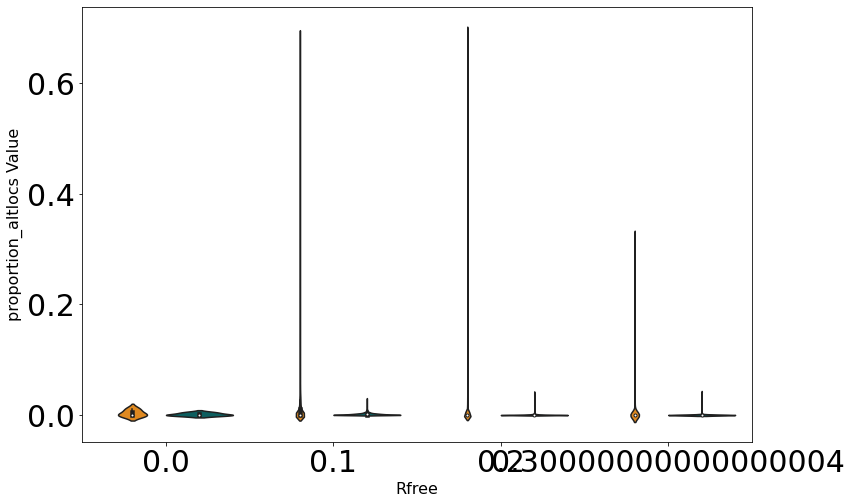

In [104]:
for metric in ['proportion_altlocs']:
    # Perform paired t-tests
    print(metric)
    print('RFREE')
    metrics_stats['resolution_group'] = (metrics_stats['RFree'] // 0.1) * 0.1
    
    # Reshape the data to have 'close' and 'all' in one column for each metric
    metrics_stats_melted = metrics_stats.melt(id_vars=['resolution_group'], 
                                              value_vars=[f'{metric}_close_normalized', f'{metric}_all_normalized'], 
                                              var_name='Close_Dist', 
                                              value_name=f'{metric}_value')

    metrics_stats_melted = metrics_stats_melted[metrics_stats_melted['resolution_group'] <= 0.39]

    # Grouping by resolution group and residue type to calculate mean and median
    grouped = metrics_stats_melted.groupby(['resolution_group', 'Close_Dist'])[f'{metric}_value']
    
    metrics_stats_melted[f'{metric}_value'] = np.log(metrics_stats_melted[f'{metric}_value'] + 1)
    
    # Calculating the median and mean for each group
    median_values = grouped.median().unstack()
    mean_values = grouped.mean().unstack()

    print(f"Median values for {metric}:")
    print(median_values)
    print(f"Mean values for {metric}:")
    print(mean_values)
    
    # Performing paired t-test between 'close' and 'all'
#     close_values = metrics_stats_melted[metrics_stats_melted['Residue Type'] == f'{metric}_close'][f'{metric}_value']
#     all_values = metrics_stats_melted[metrics_stats_melted['Residue Type'] == f'{metric}_all'][f'{metric}_value']
    
#     t_stat, p_value = stats.ttest_rel(close_values, all_values)
#     print(f"Paired t-test result for {metric}: t-stat = {t_stat}, p-value = {p_value}\n")
    
    # Plotting the grouped boxplot
    plt.figure(figsize=(12, 8))
    sns.violinplot(x='resolution_group', y=f'{metric}_value', hue='Close_Dist', 
                data=metrics_stats_melted, dodge=True, palette=['#FF8C00', '#006C6C'])
    
    plt.xlabel('Rfree', fontsize=16)
    plt.ylabel(f'{metric} Value', fontsize=16)
    plt.legend(labels=['Close Residues', 'All Residues'])
    plt.legend().remove()
    plt.savefig(f"{metric}_rfree_grouped_boxplot.png")
    #plt.show()
